In [1]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'Malgun Gothic'


pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

- mu_15: 15분당 평균 대여 자전거 수
- lambda_15: 15분당 평균 반납 자전거 수
- L_s : 대여소 내 평균 자전거 수
- W_s : 대여소 내 평균 대기시간(자전거 반납 후 재대여 될 때까지의 시간)

In [2]:
df = pd.read_excel('./data/4월 대여소별 Ls, Lq, Ws, Wq.xlsx')
df

,자치구,대여소명,시간,lambda_15,mu_15,rho,p_c,L_s,L_q,W_s,W_q
0,중랑구,(구)신한은행 중랑교지점,0,0.400000,0.433333,0.923077,0.092889,3.082664,2.245331,8.495829,6.188137
1,중랑구,(구)신한은행 중랑교지점,1,0.333333,0.441667,0.754717,0.038235,2.135755,1.409894,6.661985,4.397834
2,중랑구,(구)신한은행 중랑교지점,2,0.208333,0.241667,0.862069,0.070224,2.738787,1.937256,14.139084,10.001153
3,중랑구,(구)신한은행 중랑교지점,3,0.116667,0.100000,1.166667,0.201593,4.289185,3.357709,46.047218,36.047218
4,중랑구,(구)신한은행 중랑교지점,4,0.100000,0.233333,0.428571,0.001519,0.740885,0.312964,7.420120,3.134406
...,...,...,...,...,...,...,...,...,...,...,...
59683,강서구,힐스테이트에코,19,1.758333,2.108333,0.833992,0.025415,3.491625,2.678829,2.037543,1.563235
59684,강서구,힐스테이트에코,20,0.983333,1.850000,0.531532,0.000448,1.128509,0.597216,1.148152,0.607611
59685,강서구,힐스테이트에코,21,0.950000,1.416667,0.670588,0.004096,1.935655,1.267813,2.045911,1.340029
59686,강서구,힐스테이트에코,22,0.558333,0.750000,0.744444,0.010243,2.554999,1.818179,4.623473,3.290140


In [3]:
df = df.drop(['p_c', 'L_q', 'W_q'], axis = 1)
df.head()

,자치구,대여소명,시간,lambda_15,mu_15,rho,L_s,W_s
0,중랑구,(구)신한은행 중랑교지점,0,0.400000,0.433333,0.923077,3.082664,8.495829
1,중랑구,(구)신한은행 중랑교지점,1,0.333333,0.441667,0.754717,2.135755,6.661985
2,중랑구,(구)신한은행 중랑교지점,2,0.208333,0.241667,0.862069,2.738787,14.139084
3,중랑구,(구)신한은행 중랑교지점,3,0.116667,0.100000,1.166667,4.289185,46.047218
4,중랑구,(구)신한은행 중랑교지점,4,0.100000,0.233333,0.428571,0.740885,7.420120


# 자치구별(시간 제외)

In [4]:
dft_pivot_lambda = df.pivot_table(index = ['자치구'], values = ['lambda_15']).T
dft_pivot_lambda.head()

자치구,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
lambda_15,0.223597,0.421886,0.312076,0.602899,0.446439,0.593676,0.428719,0.291855,0.46285,0.314483,0.429231,0.356164,0.576238,0.333417,0.290088,0.542139,0.392079,0.471145,0.512258,0.71662,0.296859,0.3451,0.327819,0.249778,0.355794


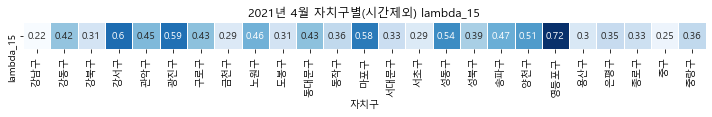

In [5]:
plt.figure(figsize = (10, 14))
sns.heatmap(dft_pivot_lambda, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2021년 4월 자치구별(시간제외) lambda_15')
plt.tight_layout()
plt.show()

In [6]:
dft_pivot_lambda_std = df.pivot_table(index = ['자치구'], values = ['lambda_15'], aggfunc = 'std').T
dft_pivot_lambda_std.head()

자치구,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
lambda_15,0.325409,0.553034,0.336067,0.803217,0.800147,1.109451,0.68312,0.496503,0.551959,0.415742,0.520429,0.527535,0.856067,0.414801,0.529847,0.855775,0.504318,0.66499,0.685725,1.167455,0.475351,0.547991,0.409651,0.311885,0.425649


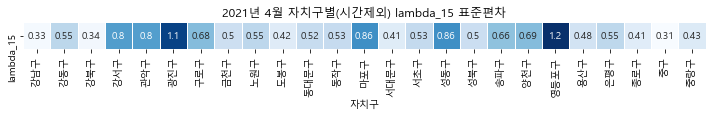

In [7]:
plt.figure(figsize = (10, 14))
sns.heatmap(dft_pivot_lambda_std, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2021년 4월 자치구별(시간제외) lambda_15 표준편차')
plt.tight_layout()
plt.show()

In [8]:
dft_pivot_mu = df.pivot_table(index = ['자치구'], values = ['mu_15']).T
dft_pivot_mu.head()

자치구,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
mu_15,0.236639,0.410559,0.313806,0.597659,0.452473,0.58891,0.425387,0.294809,0.461157,0.308833,0.426868,0.355261,0.573897,0.343514,0.293038,0.537755,0.390516,0.467007,0.505798,0.717208,0.29804,0.334911,0.347869,0.269255,0.342746


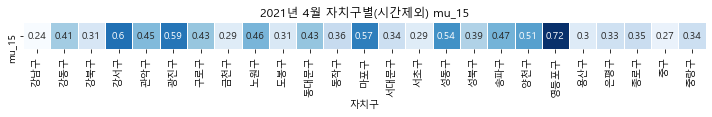

In [9]:
plt.figure(figsize = (10, 14))
sns.heatmap(dft_pivot_mu, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2021년 4월 자치구별(시간제외) mu_15')
plt.tight_layout()
plt.show()

In [10]:
dft_pivot_mu_std = df.pivot_table(index = ['자치구'], values = ['mu_15'], aggfunc = 'std').T
dft_pivot_mu_std.head()

자치구,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
mu_15,0.330218,0.503557,0.336612,0.772484,0.733338,0.967755,0.665862,0.47693,0.535353,0.378913,0.493926,0.449249,0.784423,0.378373,0.480008,0.822999,0.451537,0.6585,0.631113,1.146142,0.452285,0.459502,0.426305,0.339686,0.373333


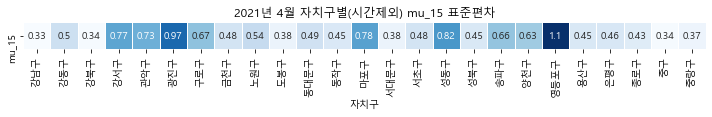

In [11]:
plt.figure(figsize = (10, 14))
sns.heatmap(dft_pivot_mu_std, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2021년 4월 자치구별(시간제외) mu_15 표준편차')
plt.tight_layout()
plt.show()

In [12]:
dft_pivot_rho = df.pivot_table(index = ['자치구'], values = ['rho']).T
dft_pivot_rho.head()

자치구,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
rho,1.101212,1.176368,1.150253,1.270071,1.037242,1.143972,1.251297,1.714692,1.111695,1.075571,1.111427,1.057997,1.236182,1.154466,1.027247,1.260919,1.114604,1.185208,1.057291,1.310704,1.064802,1.132745,1.080734,1.093779,1.156774


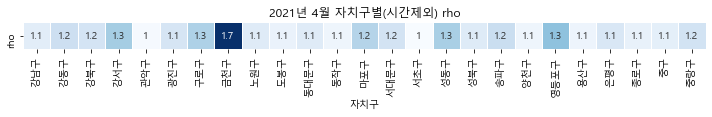

In [13]:
plt.figure(figsize = (10, 14))
sns.heatmap(dft_pivot_rho, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2021년 4월 자치구별(시간제외) rho')
plt.tight_layout()
plt.show()

In [14]:
dft_pivot_L_s = df.pivot_table(index = ['자치구'], values = ['L_s']).T
dft_pivot_L_s.head()

자치구,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
L_s,1.092671,2.281485,1.575787,3.432816,2.454763,3.588671,2.22289,1.326944,2.767194,1.789233,2.334774,2.03545,3.66526,1.813843,1.6958,3.353304,2.159304,2.721735,3.048266,4.466991,1.736095,1.990676,1.771321,1.20301,1.949281


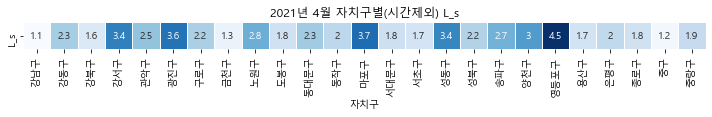

In [15]:
plt.figure(figsize = (10, 14))
sns.heatmap(dft_pivot_L_s, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2021년 4월 자치구별(시간제외) L_s')
plt.tight_layout()
plt.show()

In [16]:
dft_pivot_L_s_std = df.pivot_table(index = ['자치구'], values = ['L_s'], aggfunc = 'std').T
dft_pivot_L_s_std.head()

자치구,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
L_s,1.597642,2.89827,1.641043,4.045804,4.800186,8.52153,3.181675,2.108184,3.291316,2.511246,2.502714,3.110713,6.012755,2.342367,3.574436,5.020605,2.993779,3.922861,3.804871,7.454513,2.924774,3.577268,2.032781,1.376215,2.402922


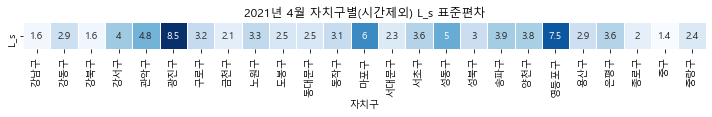

In [17]:
plt.figure(figsize = (10, 14))
sns.heatmap(dft_pivot_L_s_std, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2021년 4월 자치구별(시간제외) L_s 표준편차')
plt.tight_layout()
plt.show()

In [18]:
dft_pivot_W_s = df.pivot_table(index = ['자치구'], values = ['W_s']).T
dft_pivot_W_s.head()

자치구,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
W_s,18.669551,20.64755,15.690824,30.353099,14.743204,21.40726,27.731581,20.832622,23.779485,16.756956,19.863739,18.281976,34.236411,20.970355,21.17795,33.09786,17.002528,28.239382,25.462365,37.578038,23.52731,16.78825,26.086899,21.741583,17.840915


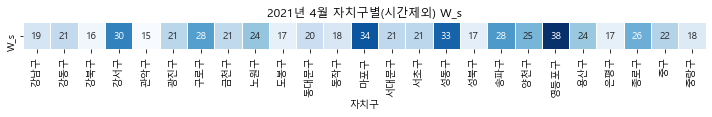

In [19]:
plt.figure(figsize = (10, 14))
sns.heatmap(dft_pivot_W_s, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2021년 4월 자치구별(시간제외) W_s')
plt.tight_layout()
plt.show()

In [20]:
dft_pivot_W_s_std = df.pivot_table(index = ['자치구'], values = ['W_s'], aggfunc = 'std').T
dft_pivot_W_s_std.head()

자치구,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
W_s,54.807989,58.388218,37.924663,107.508282,40.582859,61.952823,99.358796,61.106813,75.694618,48.404913,52.644494,56.037244,103.38498,60.554286,69.220428,118.22053,56.887762,108.039075,90.967466,133.335268,90.008885,58.793391,80.643448,69.930345,50.40925


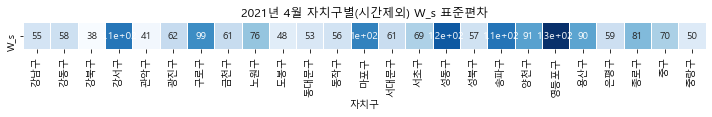

In [21]:
plt.figure(figsize = (10, 14))
sns.heatmap(dft_pivot_W_s_std, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2021년 4월 자치구별(시간제외) W_s 표준편차')
plt.tight_layout()
plt.show()

# 자치구별 시간별

In [22]:
df_pivot_lambda = df.pivot_table(index = ['자치구'], columns = ['시간'], values = ['lambda_15'])
df_pivot_lambda.head()

lambda_15                                                              \
시간         0         1         2         3         4         5         6    
자치구                                                                         
강남구  0.092751  0.070148  0.055537  0.032306  0.022203  0.017523  0.049201   
강동구  0.212903  0.134588  0.094086  0.044444  0.036022  0.058154  0.133065   
강북구  0.217063  0.142328  0.116799  0.072884  0.059921  0.058598  0.081217   
강서구  0.224796  0.138548  0.089519  0.056595  0.041309  0.064519  0.163497   
관악구  0.294595  0.201014  0.138288  0.084459  0.055293  0.065991  0.101914   

                                                                           \
시간         7         8         9         10        11        12        13   
자치구                                                                         
강남구  0.168265  0.360788  0.262728  0.173116  0.183390  0.261301  0.272831   
강동구  0.315233  0.546685  0.338978  0.288889  0.342473  0.412903  0.463620   
강북구  0.175132  0.372090  0.251455  0.219841  0.261376  0.312963  0.330688   
강서구  0.524438  1.180164  0.599642  0.418303  0.475665  0.602863  0.653732   
관악구  0.238176  0.491216  0.316892  0.292455  0.312162  0.397185  0.444144   

                                                                           \
시간         14        15        16        17        18        19        20   
자치구                                                                         
강남구  0.274315  0.315753  0.384247  0.490868  0.564269  0.417123  0.285788   
강동구  0.450269  0.543638  0.652330  0.800090  1.094086  0.882437  0.653853   
강북구  0.380820  0.425926  0.483862  0.559921  0.706349  0.588492  0.479101   
강서구  0.687117  0.762730  0.907055  1.186554  1.650409  1.226431  0.896728   
관악구  0.489977  0.546734  0.641667  0.811599  1.165991  0.974099  0.726351   

                                   
시간         21        22        23  
자치구                                
강남구  0.250685  0.232420  0.128767  
강동구  0.629211  0.633602  0.363710  
강북구  0.430159  0.452910  0.309921  
강서구  0.770501  0.757873  0.390593  
관악구  0.710698  0.746284  0.467342

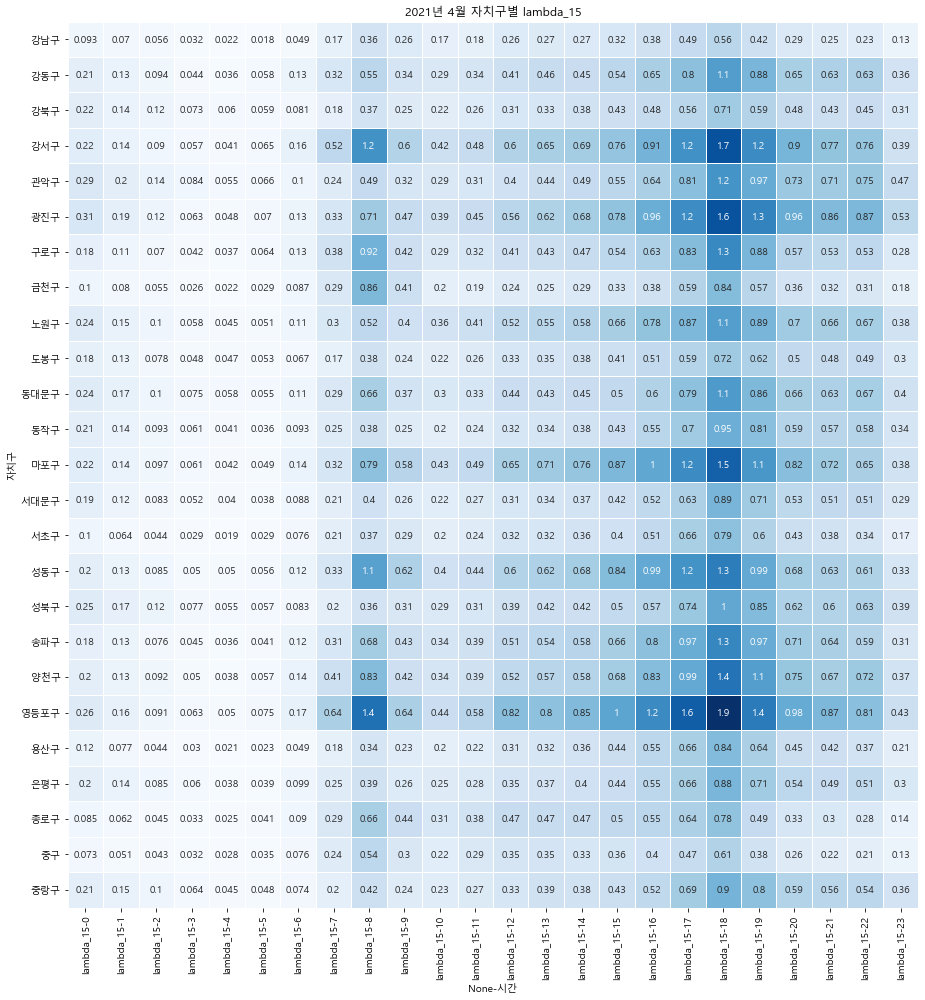

In [23]:
plt.figure(figsize = (24, 14))
sns.heatmap(df_pivot_lambda, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2021년 4월 자치구별 lambda_15')
plt.tight_layout()
plt.show()

In [24]:
df_pivot_lambda_std = df.pivot_table(index = ['자치구'], columns = ['시간'], values = ['lambda_15'], aggfunc = 'std')
df_pivot_lambda_std.head()

lambda_15                                                              \
시간         0         1         2         3         4         5         6    
자치구                                                                         
강남구  0.106540  0.073512  0.064381  0.037954  0.028167  0.032852  0.085536   
강동구  0.209008  0.139908  0.110017  0.052810  0.048578  0.092307  0.187974   
강북구  0.158866  0.118205  0.099444  0.067617  0.070470  0.083507  0.129852   
강서구  0.191689  0.121268  0.090483  0.059659  0.043630  0.090065  0.274389   
관악구  0.346194  0.238183  0.157993  0.106775  0.075115  0.132264  0.166006   

                                                                           \
시간         7         8         9         10        11        12        13   
자치구                                                                         
강남구  0.223211  0.488801  0.345537  0.164004  0.167459  0.232226  0.249238   
강동구  0.470304  0.741693  0.369192  0.265618  0.320293  0.362012  0.407765   
강북구  0.220583  0.387611  0.276307  0.212646  0.235894  0.269519  0.277008   
강서구  0.800394  1.528725  0.721512  0.431874  0.439457  0.506357  0.552402   
관악구  0.420887  0.817846  0.385076  0.365943  0.371510  0.473654  0.564124   

                                                                           \
시간         14        15        16        17        18        19        20   
자치구                                                                         
강남구  0.265124  0.327453  0.438334  0.531935  0.566371  0.449483  0.301109   
강동구  0.391982  0.473473  0.582142  0.717196  1.023186  0.800529  0.613541   
강북구  0.322772  0.338565  0.388286  0.414678  0.521055  0.445013  0.341879   
강서구  0.566776  0.643992  0.761149  1.078939  1.405721  0.975247  0.723606   
관악구  0.632595  0.750702  0.945281  1.174215  1.708386  1.385879  1.016346   

                                   
시간         21        22        23  
자치구                                
강남구  0.269071  0.242750  0.143589  
강동구  0.554974  0.591839  0.346259  
강북구  0.308923  0.319593  0.230036  
강서구  0.587532  0.585426  0.310860  
관악구  0.987789  0.960961  0.639706

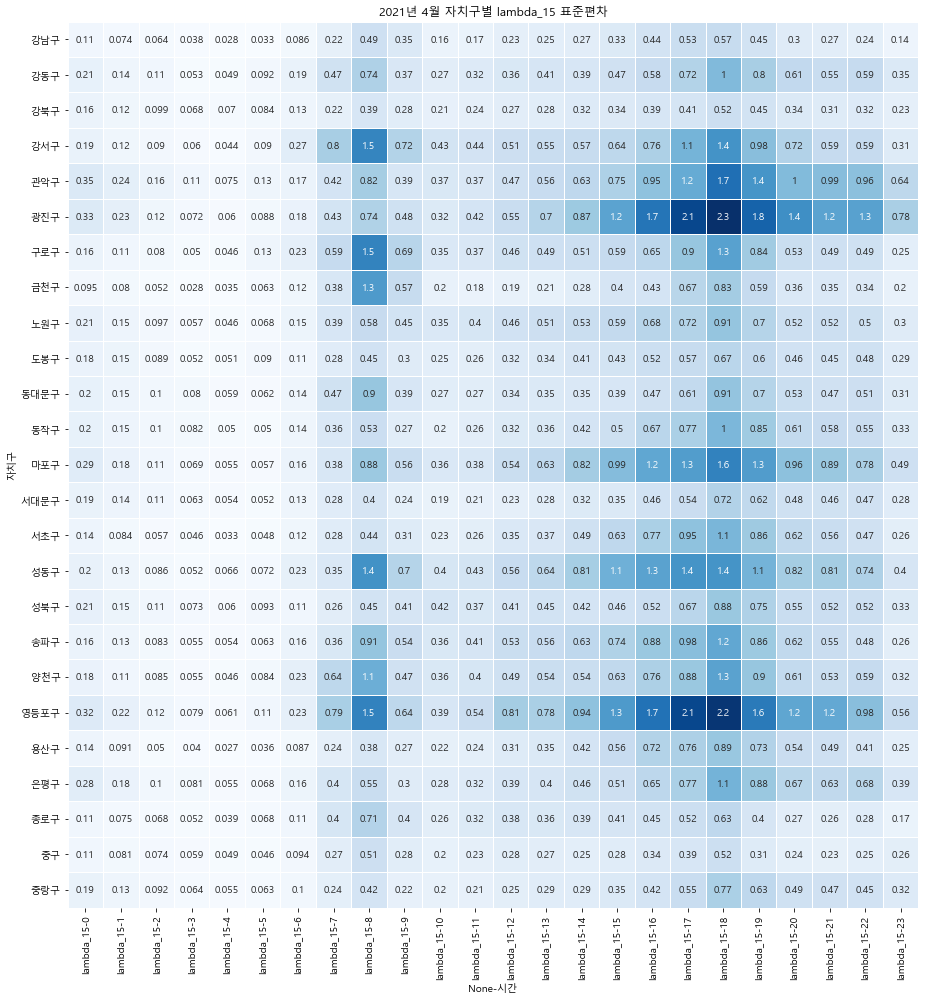

In [25]:
plt.figure(figsize = (24, 14))
sns.heatmap(df_pivot_lambda_std, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2021년 4월 자치구별 lambda_15 표준편차')
plt.tight_layout()
plt.show()

In [26]:
df_pivot_mu = df.pivot_table(index = ['자치구'], columns = ['시간'], values = ['mu_15'])
df_pivot_mu.head()

mu_15                                                              \
시간         0         1         2         3         4         5         6    
자치구                                                                         
강남구  0.075285  0.060103  0.041952  0.029566  0.019292  0.019406  0.062957   
강동구  0.165591  0.111380  0.065681  0.038799  0.034677  0.077509  0.174642   
강북구  0.189550  0.116402  0.091402  0.055820  0.050926  0.064550  0.092063   
강서구  0.181748  0.109816  0.077710  0.048466  0.040184  0.076534  0.203119   
관악구  0.242793  0.151014  0.121284  0.081194  0.052252  0.081757  0.154167   

                                                                           \
시간         7         8         9         10        11        12        13   
자치구                                                                         
강남구  0.171575  0.296861  0.221747  0.182078  0.230993  0.276199  0.283619   
강동구  0.437724  0.628315  0.390591  0.336828  0.397043  0.470072  0.507885   
강북구  0.219048  0.356878  0.274339  0.243651  0.295106  0.338492  0.380688   
강서구  0.645297  1.174847  0.584918  0.444530  0.547597  0.648926  0.693149   
관악구  0.407095  0.644257  0.411486  0.341441  0.381869  0.472523  0.531532   

                                                                           \
시간         14        15        16        17        18        19        20   
자치구                                                                         
강남구  0.327740  0.367523  0.462272  0.626998  0.669977  0.386986  0.289555   
강동구  0.517742  0.603763  0.654480  0.794444  0.911201  0.678763  0.591577   
강북구  0.416799  0.470899  0.519577  0.563360  0.709656  0.519577  0.462169   
강서구  0.736299  0.836401  0.942638  1.258333  1.594683  1.031442  0.830266   
관악구  0.579842  0.613288  0.692455  0.796622  0.979167  0.767342  0.682995   

                                   
시간         21        22        23  
자치구                                
강남구  0.253881  0.216267  0.106507  
강동구  0.557437  0.467921  0.239337  
강북구  0.454894  0.398677  0.246825  
강서구  0.729397  0.608793  0.298722  
관악구  0.704955  0.638176  0.329842

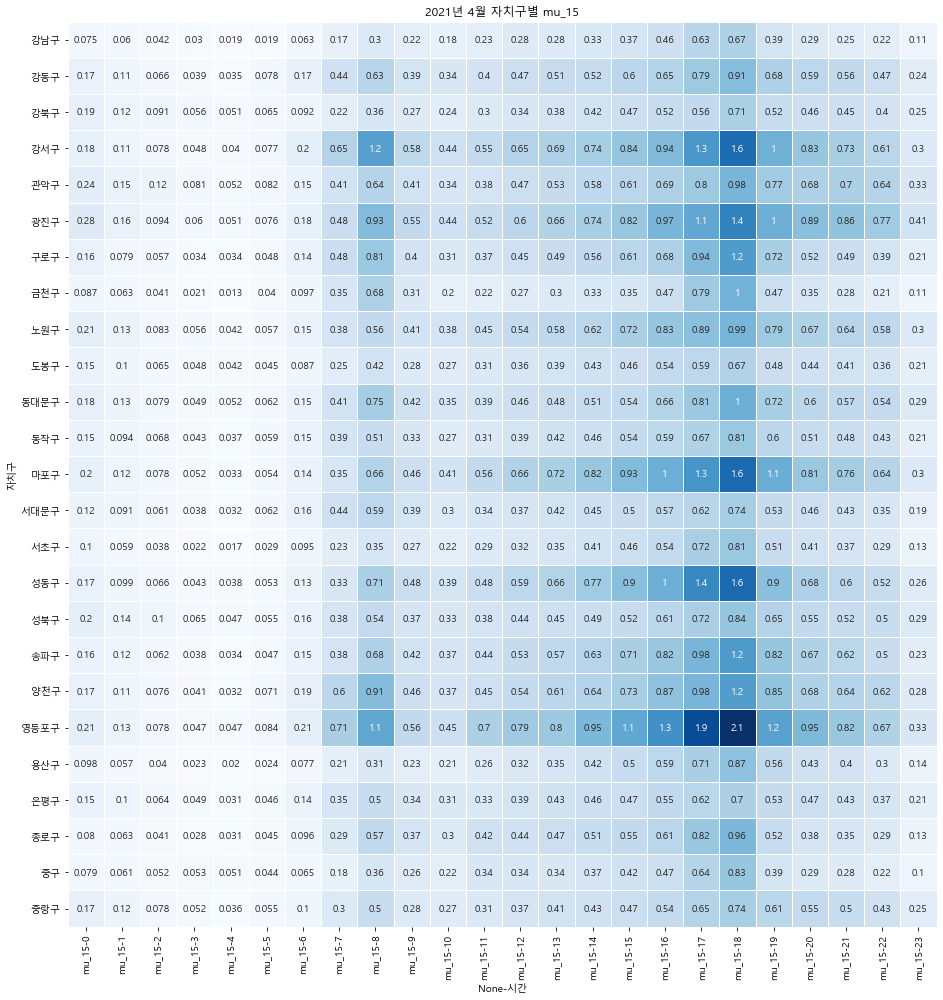

In [27]:
plt.figure(figsize = (24, 14))
sns.heatmap(df_pivot_mu, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2021년 4월 자치구별 mu_15')
plt.tight_layout()
plt.show()

In [28]:
df_pivot_mu_std = df.pivot_table(index = ['자치구'], columns = ['시간'], values = ['mu_15'], aggfunc = 'std')
df_pivot_mu_std.head()

mu_15                                                              \
시간         0         1         2         3         4         5         6    
자치구                                                                         
강남구  0.068972  0.059863  0.044339  0.034838  0.027591  0.036253  0.098907   
강동구  0.165404  0.112576  0.075949  0.050786  0.052651  0.121278  0.194884   
강북구  0.138976  0.103132  0.090238  0.068598  0.054133  0.087695  0.085803   
강서구  0.160622  0.106384  0.080475  0.054749  0.043910  0.086430  0.201399   
관악구  0.332714  0.183011  0.197983  0.137188  0.066170  0.111647  0.200058   

                                                                           \
시간         7         8         9         10        11        12        13   
자치구                                                                         
강남구  0.207608  0.325027  0.202842  0.142455  0.177819  0.214574  0.250462   
강동구  0.396354  0.629664  0.362635  0.264376  0.322813  0.399763  0.434249   
강북구  0.167735  0.234657  0.197539  0.157487  0.192946  0.231485  0.262026   
강서구  0.613118  1.210456  0.504588  0.319975  0.410421  0.492749  0.529477   
관악구  0.548286  0.800080  0.507896  0.377739  0.413049  0.548871  0.608123   

                                                                           \
시간         14        15        16        17        18        19        20   
자치구                                                                         
강남구  0.277708  0.331892  0.429190  0.621550  0.620301  0.408982  0.292351   
강동구  0.415911  0.493626  0.529563  0.752675  0.878244  0.683935  0.571775   
강북구  0.301521  0.343722  0.371947  0.431088  0.600004  0.466465  0.415306   
강서구  0.577740  0.669541  0.742794  1.131240  1.542073  0.956532  0.768682   
관악구  0.677655  0.754346  0.889447  1.027507  1.326841  1.069269  0.957728   

                                   
시간         21        22        23  
자치구                                
강남구  0.250289  0.221332  0.106694  
강동구  0.547445  0.446918  0.214413  
강북구  0.439263  0.325865  0.182208  
강서구  0.683595  0.543434  0.256603  
관악구  1.050066  1.005139  0.456694

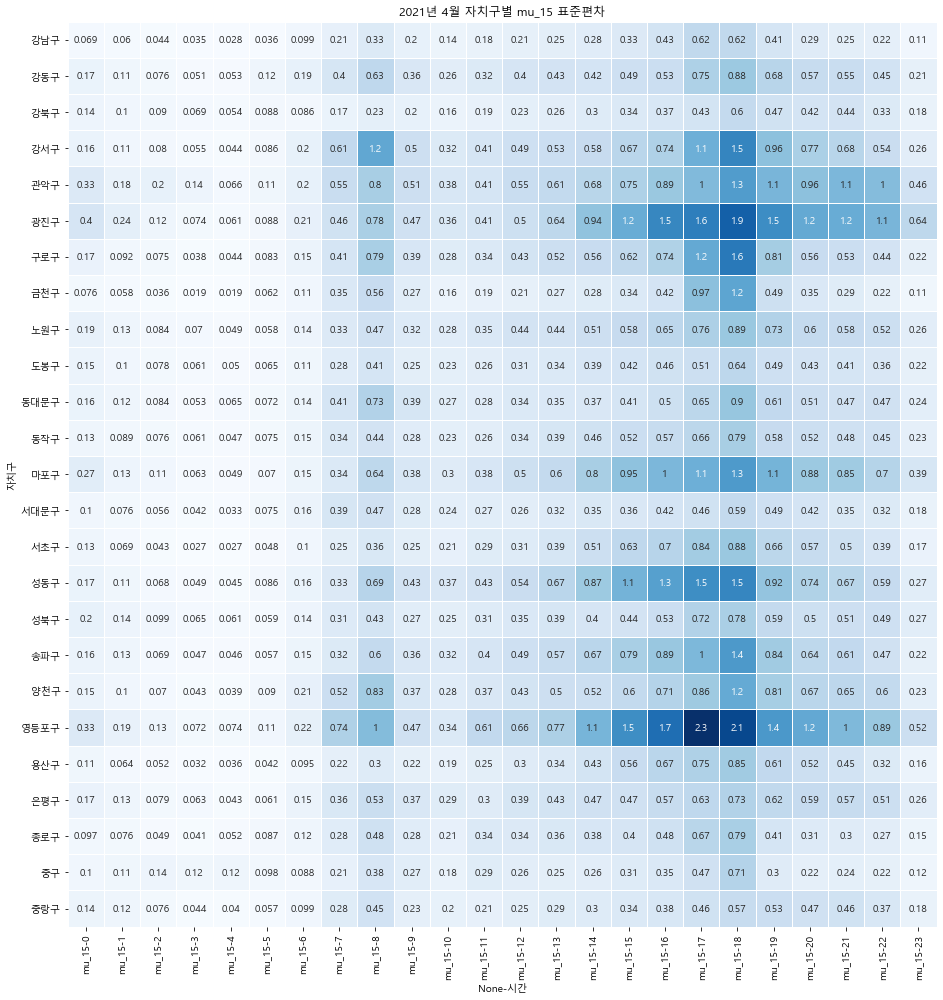

In [29]:
plt.figure(figsize = (24, 14))
sns.heatmap(df_pivot_mu_std, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2021년 4월 자치구별 mu_15 표준편차')
plt.tight_layout()
plt.show()

In [30]:
df_pivot_rho = df.pivot_table(index = ['자치구'], columns = ['시간'], values = ['rho'])
df_pivot_rho.head()

rho                                                              \
시간         0         1         2         3         4         5         6    
자치구                                                                         
강남구  1.287143  1.286322  1.370028  0.922573  0.922060  0.653240  1.495139   
강동구  1.367358  1.352358  1.530736  1.220550  0.713687  0.966144  2.038605   
강북구  1.203807  1.575420  1.666021  1.454358  1.642498  1.271837  1.229414   
강서구  1.424760  1.536059  1.452248  1.480003  1.355609  1.509084  1.714532   
관악구  1.313336  1.270148  1.556429  1.158803  1.189102  1.080645  1.013946   

                                                                           \
시간         7         8         9         10        11        12        13   
자치구                                                                         
강남구  1.544029  1.874079  1.693660  1.027578  0.765099  0.933247  0.987631   
강동구  1.218396  1.046958  1.049063  0.879923  0.840602  0.878384  0.878030   
강북구  0.958564  1.537442  1.138550  0.853020  0.775498  0.827857  0.782798   
강서구  1.666045  1.995742  1.287270  0.882919  0.792118  0.878735  0.906626   
관악구  1.303983  0.939783  0.857645  0.805857  1.040602  0.809852  0.719535   

                                                                           \
시간         14        15        16        17        18        19        20   
자치구                                                                         
강남구  0.801684  0.806020  0.824859  0.793457  0.849594  1.107992  0.990896   
강동구  0.836002  0.872996  0.932231  1.056582  1.290586  1.467969  1.114204   
강북구  0.838666  0.844523  0.854865  0.984517  1.090408  1.193635  1.115334   
강서구  0.888849  0.851074  0.905937  0.993644  1.172403  1.239612  1.141991   
관악구  0.718896  0.777372  0.802544  0.877402  1.047840  1.141949  0.954744   

                                   
시간         21        22        23  
자치구                                
강남구  1.069616  1.199999  1.223146  
강동구  1.320714  1.692206  1.668547  
강북구  1.253815  1.259829  1.253391  
강서구  1.246798  1.580186  1.579469  
관악구  0.969995  1.204841  1.338558

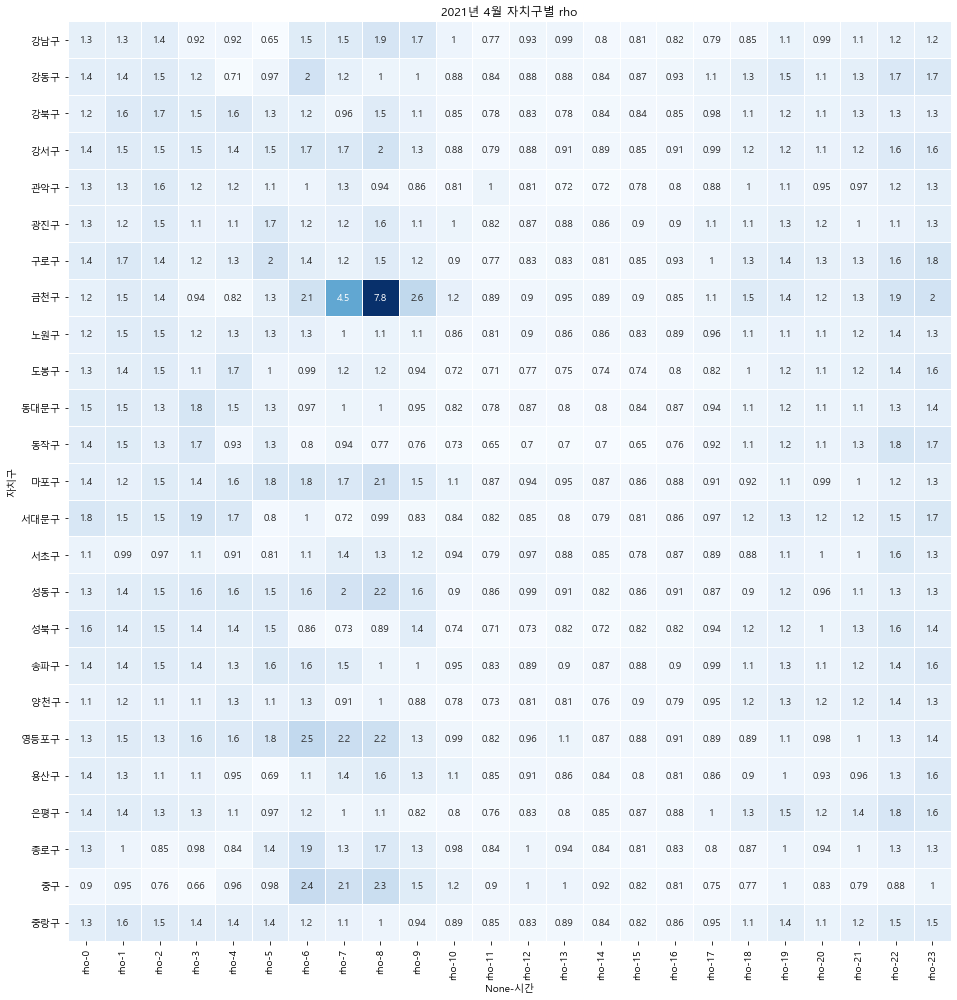

In [31]:
plt.figure(figsize = (24, 14))
sns.heatmap(df_pivot_rho, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2021년 4월 자치구별 rho')
plt.tight_layout()
plt.show()

In [32]:
df_pivot_L_s = df.pivot_table(index = ['자치구'], columns = ['시간'], values = ['L_s'])
df_pivot_L_s.head()

L_s                                                              \
시간         0         1         2         3         4         5         6    
자치구                                                                         
강남구  1.287116  1.210622  1.231276  1.020975  0.981717  0.674255  0.913800   
강동구  2.923644  2.694952  2.812750  2.304095  1.735459  1.536287  1.914738   
강북구  1.746027  1.764385  1.737366  1.669677  1.422851  1.215531  1.512854   
강서구  3.712818  3.925119  3.357624  3.452749  2.938856  3.096014  3.094882   
관악구  2.929153  3.430472  2.962193  2.539536  2.832499  2.225888  1.624476   

                                                                           \
시간         7         8         9         10        11        12        13   
자치구                                                                         
강남구  1.109897  1.220358  1.233698  1.108976  0.974129  1.141733  1.074627   
강동구  1.721583  1.729862  1.739831  1.892256  1.868466  1.937454  1.953994   
강북구  1.457835  1.716499  1.546877  1.468520  1.530813  1.510630  1.411765   
강서구  2.895471  2.904670  3.028447  3.254515  2.984264  3.201490  3.231263   
관악구  1.413204  1.882384  1.607135  2.177144  1.758337  1.665131  1.818261   

                                                                           \
시간         14        15        16        17        18        19        20   
자치구                                                                         
강남구  0.974965  1.017713  1.027441  1.035727  1.026162  1.219910  1.119891   
강동구  1.924904  2.051474  2.419293  2.476612  2.861667  2.969770  2.620490   
강북구  1.486577  1.471226  1.542057  1.574114  1.549530  1.778254  1.601388   
강서구  3.255307  3.174224  3.515944  3.841953  3.906439  4.217880  3.841893   
관악구  1.810078  2.236582  2.530789  2.971171  3.319557  3.472105  2.951152   

                                   
시간         21        22        23  
자치구                                
강남구  1.099849  1.170852  1.348418  
강동구  2.569560  2.924505  3.171996  
강북구  1.520035  1.729576  1.854500  
강서구  3.543984  3.943751  4.068032  
관악구  2.368939  2.783320  3.604802

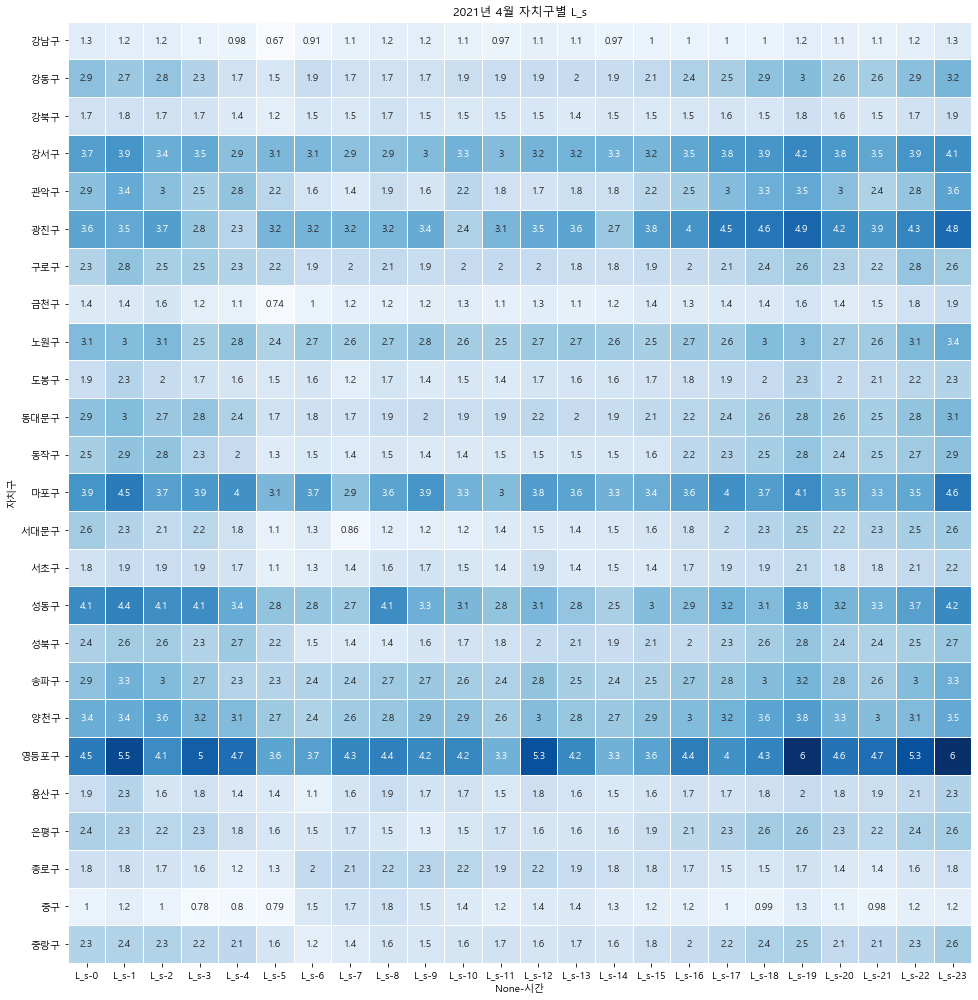

In [33]:
plt.figure(figsize = (24, 14))
sns.heatmap(df_pivot_L_s, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2021년 4월 자치구별 L_s')
plt.tight_layout()
plt.show()

In [34]:
df_pivot_L_s_std = df.pivot_table(index = ['자치구'], columns = ['시간'], values = ['L_s'], aggfunc = 'std')
df_pivot_L_s_std.head()

L_s                                                              \
시간         0         1         2         3         4         5         6    
자치구                                                                         
강남구  1.876515  1.645165  1.904074  1.885608  1.973821  1.437658  1.518922   
강동구  3.293061  3.293045  3.558110  3.314368  3.067061  2.848962  3.239932   
강북구  1.598749  1.627739  1.597608  1.680663  1.795246  1.871553  2.181636   
강서구  3.638842  4.020598  3.861564  4.587822  4.461404  5.509345  5.428994   
관악구  4.614656  5.626287  5.112358  4.886525  5.837034  6.648386  3.968832   

                                                                           \
시간         7         8         9         10        11        12        13   
자치구                                                                         
강남구  1.920935  1.898435  1.874965  1.584779  1.357387  1.676006  1.175928   
강동구  2.902415  2.613707  2.083945  2.500660  2.177027  2.016479  1.945405   
강북구  2.274127  2.248899  2.109035  1.716408  1.683632  1.496414  1.334079   
강서구  4.674650  4.225538  4.361370  4.529226  3.679468  3.368995  3.417269   
관악구  3.649536  4.249219  2.883601  5.492118  3.106894  2.038019  2.878470   

                                                                           \
시간         14        15        16        17        18        19        20   
자치구                                                                         
강남구  1.081093  1.173583  1.418057  1.586023  1.241195  1.483777  1.288395   
강동구  2.073353  2.214110  2.707636  2.798831  3.234283  3.232814  2.969206   
강북구  1.402488  1.243472  1.402671  1.273451  1.229000  1.533052  1.164243   
강서구  3.218866  2.971871  3.400702  4.090958  3.736741  3.880052  3.630715   
관악구  2.544972  3.864798  5.259715  6.063467  6.468267  6.413322  4.733928   

                                   
시간         21        22        23  
자치구                                
강남구  1.382618  1.480776  1.891756  
강동구  2.870356  3.271187  3.611449  
강북구  1.367068  1.410129  1.549304  
강서구  3.429452  3.796246  3.815457  
관악구  3.279963  3.963518  6.576271

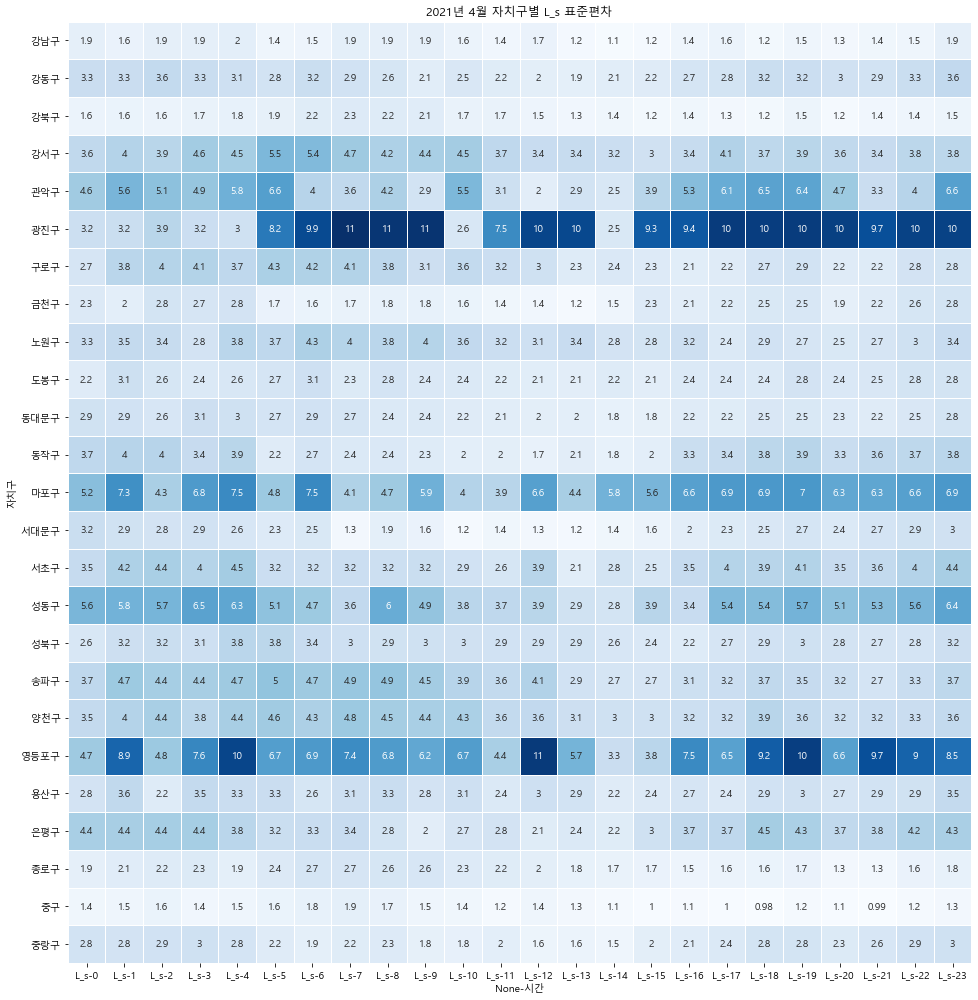

In [35]:
plt.figure(figsize = (24, 14))
sns.heatmap(df_pivot_L_s_std, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2021년 4월 자치구별 L_s 표준편차')
plt.tight_layout()
plt.show()

In [36]:
df_pivot_W_s = df.pivot_table(index = ['자치구'], columns = ['시간'], values = ['W_s'])
df_pivot_W_s.head()

W_s                                                           \
시간          0          1          2           3           4          5    
자치구                                                                       
강남구  25.152894  34.068547  43.447772   51.070604   70.251620  59.492232   
강동구  26.208156  37.251310  57.415807  101.184851   71.526417  56.546385   
강북구  14.152270  22.205350  34.132579   53.463081   53.824341  47.420397   
강서구  29.098081  74.241010  79.915140  148.491363  129.346788  99.816198   
관악구  13.244133  23.329605  34.930306   42.889104   76.050091  44.898498   

                                                                             \
시간          6          7         8         9         10        11        12   
자치구                                                                           
강남구  50.447219  15.076676  8.195273  9.221778  8.535738  6.443646  5.188864   
강동구  32.253096   8.340447  5.611988  8.023352  7.848936  6.367984  5.886723   
강북구  42.999696  12.546028  9.015934  8.946687  8.548252  6.803902  6.300266   
강서구  46.674491  11.042149  5.570110  8.254834  8.729873  6.831120  5.839855   
관악구  29.029592  12.337210  5.190229  6.319616  6.867504  5.793578  4.652003   

                                                                           \
시간         13        14        15        16        17        18        19   
자치구                                                                         
강남구  4.904902  4.147583  3.747428  3.140039  2.472998  2.310620  4.026052   
강동구  5.137768  4.906284  4.393114  4.319177  4.067617  4.243848  5.337676   
강북구  4.971558  4.704589  4.220907  3.825608  3.675742  3.193575  4.458819   
강서구  5.502933  5.230684  4.642588  4.254715  3.759126  3.409855  5.049813   
관악구  3.919784  3.847906  3.869220  3.509550  3.448634  3.020924  3.975512   

                                              
시간         20        21        22         23  
자치구                                           
강남구  5.235149  5.982891  7.836067  17.672629  
강동구  5.915079  6.965838  9.225090  16.564260  
강북구  5.222905  6.518053  5.820850   9.608390  
강서구  6.073707  7.488031  9.698413  19.513489  
관악구  4.245214  4.126003  4.836573   9.506102

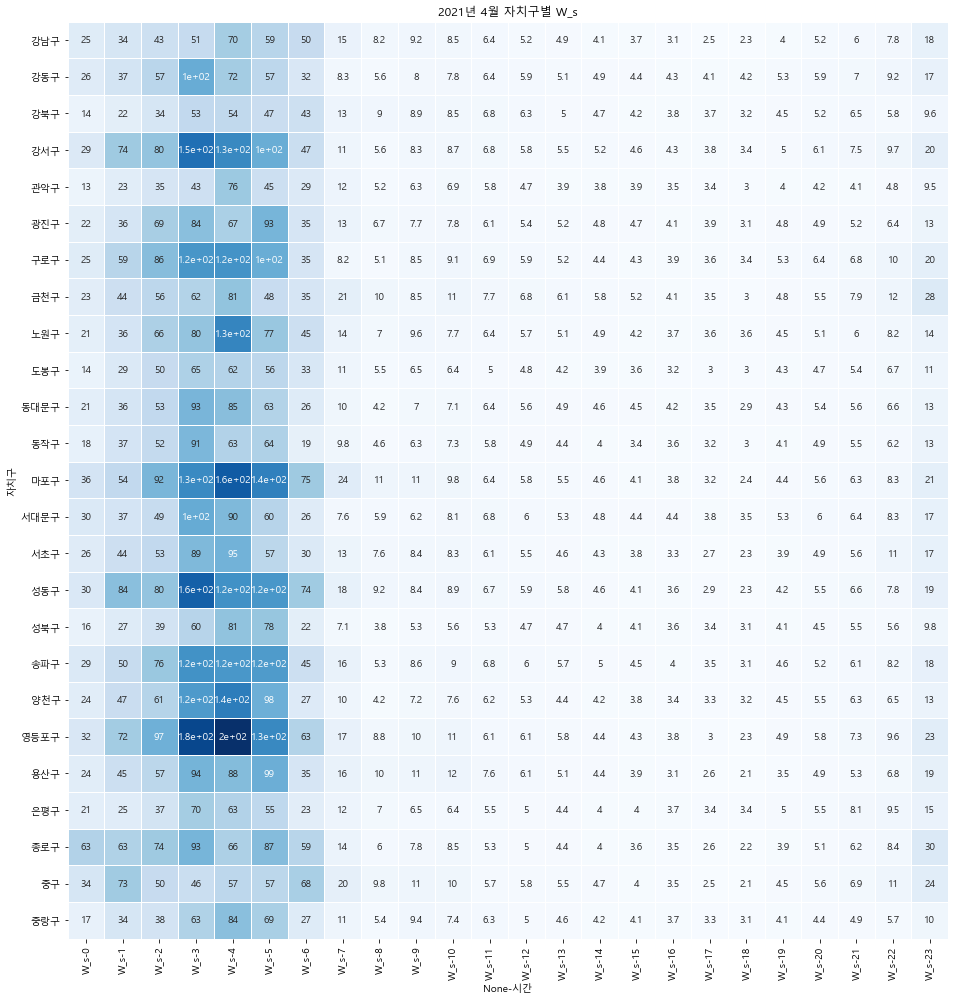

In [37]:
plt.figure(figsize = (24, 14))
sns.heatmap(df_pivot_W_s, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2021년 4월 자치구별 W_s')
plt.tight_layout()
plt.show()

In [38]:
df_pivot_W_s_std = df.pivot_table(index = ['자치구'], columns = ['시간'], values = ['W_s'], aggfunc = 'std')
df_pivot_W_s_std.head()

W_s                                                              \
시간          0           1           2           3           4           5    
자치구                                                                          
강남구  36.033600   50.157419   62.514144   86.327724  119.544918  146.033622   
강동구  30.627544   36.113773   66.762330  171.410475  118.520502  114.429992   
강북구  16.808280   17.151791   39.524721   72.581805   78.878515   77.565632   
강서구  26.100183  179.589008  130.390243  316.773688  191.843827  190.549019   
관악구  14.388760   25.196058   41.415509   65.194923  120.955556   77.834815   

                                                                      \
시간           6          7          8          9         10        11   
자치구                                                                    
강남구  101.178965  20.367525  13.404157  13.445315  7.866739  6.206367   
강동구   55.168290  11.330508   6.654019   6.751505  5.244311  3.298099   
강북구   87.513423  19.190352  17.753986   8.580256  6.675167  4.148754   
강서구  107.268303  19.832014  10.092788  10.740037  7.484011  4.944275   
관악구   58.776868  30.350695   6.975873   6.581268  5.744211  4.839344   

                                                                           \
시간         12        13        14        15        16        17        18   
자치구                                                                         
강남구  4.304753  3.434401  3.041379  2.512124  2.545863  2.050376  1.924164   
강동구  3.526383  2.462743  2.599762  2.326697  2.178532  2.383841  3.120581   
강북구  5.262592  2.435713  2.390033  2.039946  1.821784  1.844349  1.977613   
강서구  3.423123  3.098420  2.820701  2.579942  2.191628  2.301932  2.347555   
관악구  3.450565  2.533499  2.720971  2.601259  2.290041  2.418468  2.143060   

                                                        
시간         19        20        21        22         23  
자치구                                                     
강남구  2.936540  4.052585  5.639598  7.342901  20.785236  
강동구  3.133211  4.090902  7.058545  8.997423  11.996620  
강북구  2.509625  3.445692  8.556109  3.439474   8.156704  
강서구  3.066155  4.045758  6.056203  8.217082  18.653578  
관악구  2.731838  3.080955  3.683148  3.943138   7.473516

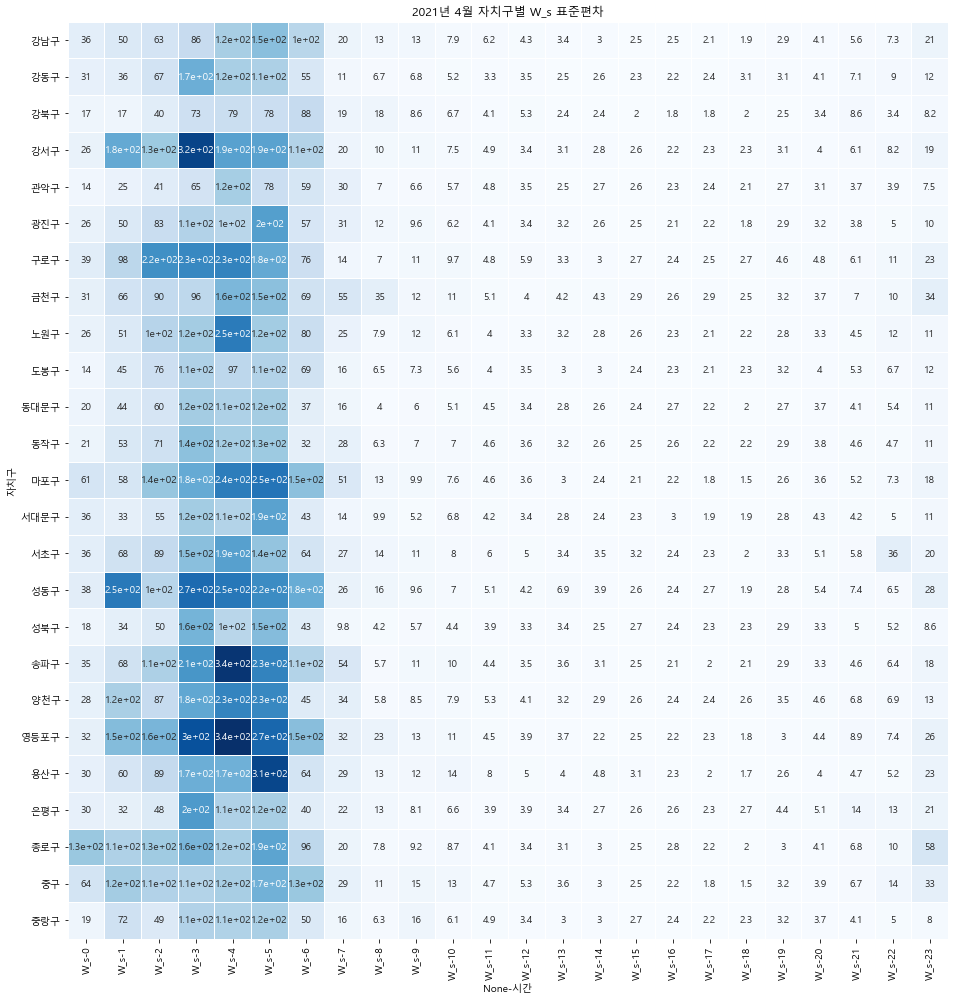

In [39]:
plt.figure(figsize = (24, 14))
sns.heatmap(df_pivot_W_s_std, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2021년 4월 자치구별 W_s 표준편차')
plt.tight_layout()
plt.show()

# 학교/ 아파트/ 지하철역/공원 근처 대여소 분석

In [40]:
s = pd.DataFrame(df['대여소명'].unique()).rename(columns = {0 : 'station'})
s

,station
0,(구)신한은행 중랑교지점
1,(시립)고덕평생학습관
2,(재)FITI시험연구원
3,3호선 매봉역 3번출구앞
4,419민주묘지 입구사거리
...,...
2478,흑석한강푸르지오(110동)
2479,흥국사 정류장
2480,희성오피앙
2481,희훈타워빌 앞


In [41]:
school = []
subway = []
apart = []
park = []
for i in range(len(s)):
    if '출구' in s['station'][i]:
        subway.append(s['station'][i])
    elif '학교' in s['station'][i]:
        school.append(s['station'][i])
    elif '아파트' in s['station'][i]:
        apart.append(s['station'][i]) 
    elif '공원' in s['station'][i]:
        park.append(s['station'][i])

In [42]:
school

['광운대학교 중앙도서관',
 '현대고등학교 건너편',
 'KC 대학교',
 '가락고등학교 앞',
 '가락중학교 앞',
 '가재울 초등학교',
 '강서초등학교',
 '강남중학교 앞',
 '강동경희대학교병원 입구',
 '강북중학교 앞',
 '강서공업고등학교 앞',
 '개포고등학교 정문앞',
 '거여초등학교 옆',
 '건국대학교 (입학정보관)',
 '건국대학교 (행정관)',
 '건국대학교 과학관(이과대) 앞',
 '건국대학교 정문 앞',
 '건국대학교 학생회관',
 '경기여자고등학교 후문 (삼성로3길 입구)',
 '경문고등학교 앞',
 '경일중학교 앞',
 '경희대학교 청운관',
 '고덕초등학교',
 '공항중학교 버스정류장',
 '공항중학교앞',
 '공항초등학교건너편',
 '광남중학교',
 '광양중학교 앞',
 '광운초등학교 앞',
 '구로중학교앞',
 '구암초등학교 버스정류장',
 '구일고등학교 정문',
 '노원 을지대학교 병원',
 '노일초등학교 앞',
 '답십리초등학교 앞(현대시장 옆)',
 '답십리초등학교 옆 공원',
 '대광고등학교',
 '대진고등학교',
 '도봉고등학교 맞은편',
 '독산고등학교',
 '동대문중학교 옆',
 '동성중학교 앞',
 '동양미래대학교 정문 옆',
 '마곡엠?釉?6_7단지 마곡중학교',
 '마곡엠밸리6_7단지 마곡중학교',
 '마곡중학교 후문',
 '면목초등학교',
 '명지대학교 도서관',
 '명지전문대학교 정문 앞',
 '모두의학교',
 '묘곡초등학교',
 '문정중학교',
 '문현중고등학교 사이',
 '밀알학교 입구 (삼성서울병원 입구)',
 '반포중학교 앞(세화여고 맞은편)',
 '방이초등학교',
 '방학중학교 앞',
 '배명고등학교',
 '백석예술대학교 제3캠퍼스 앞',
 '보성중고등학교 후문 앞',
 '북가좌 초등학교',
 '불암고등학교 앞 횡단보도',
 '사당중학교 버스정류소',
 '삼일초등학교 인근',
 '상계중학교(당현2교사거리)',
 '상신초등학교앞 버스정류장',
 '상암월드컵파크5단지(상암중학교)',
 '상암중학

In [43]:
len(school)

147

In [44]:
school_data = []
for i in range(len(df)):
    if df['대여소명'][i] in school:
        school_data.append(df.loc[i])
school_data = pd.DataFrame(school_data)
school_data['특성'] = '학교'
school_data

,자치구,대여소명,시간,lambda_15,mu_15,rho,L_s,W_s,특성
336,노원구,광운대학교 중앙도서관,0,0.383333,0.366667,1.045455,2.629493,8.424075,학교
337,노원구,광운대학교 중앙도서관,1,0.150000,0.208333,0.720000,1.600245,11.384947,학교
338,노원구,광운대학교 중앙도서관,2,0.075000,0.100000,0.750000,1.700921,24.443022,학교
339,노원구,광운대학교 중앙도서관,3,0.150000,0.050000,3.000000,4.508242,90.413223,학교
340,노원구,광운대학교 중앙도서관,4,0.091667,0.066667,1.375000,3.375367,54.157644,학교
...,...,...,...,...,...,...,...,...,...
59371,동대문구,휘봉고등학교 앞,19,0.675000,0.441667,1.528302,1.274610,3.632779,학교
59372,동대문구,휘봉고등학교 앞,20,0.433333,0.233333,1.857143,1.388350,7.071429,학교
59373,동대문구,휘봉고등학교 앞,21,0.283333,0.216667,1.307692,1.176730,7.230769,학교
59374,동대문구,휘봉고등학교 앞,22,0.466667,0.158333,2.947368,1.608419,11.031579,학교


In [45]:
subway

['3호선 매봉역 3번출구앞',
 '419민주묘지역 1번출구',
 '7호선 이수역7번출구',
 '9호선종합운동장역 9번출구',
 '가락시장역 3번 출구',
 '잠실새내역 5번 출구 뒤',
 '혜화역 1번출구',
 '공릉역 1번 출구 앞',
 '롯데월드타워(잠실역2번출구 쪽)',
 '영등포구청역 1번출구',
 '을지로3가역 3번출구',
 'DMC역 2번출구 옆',
 'DMC역 9번출구 앞',
 'DMC역7번출구',
 '가락시장역 2번 출구',
 '가로공원공영주차장 1번 출구',
 '가산디지털단지 7번출구',
 '가양역 8번출구',
 '가좌역 4번출구 앞',
 '가좌역1 번출구 뒤',
 '강남구청역 2번출구 뒤',
 '강남파이낸스센터앞(역삼역2번출구)',
 '강동역 1번출구 앞',
 '강변역 4번출구 뒤',
 '개봉역 1번 출구 자전거보관서쪽',
 '개화산역 2번 출구',
 '거여역 3번출구',
 '거여역 8번출구 뒤',
 '건대입구역 5번출구 뒤',
 '경복궁역 4번출구 뒤',
 '경복궁역 7번출구 앞',
 '경찰병원역 1,2번 출구 사이',
 '경찰병원역 3번출구 앞',
 '고속터미널역 8-1번, 8-2번 출구 사이',
 '고덕역 5번출구',
 '고덕역 4번출구',
 '고려대학교 2번출구',
 '고속터미널역 3번출구',
 '고속터미널역 5번출구 앞',
 '공덕역 2번출구',
 '공덕역 5번출구',
 '공덕역 8번출구',
 '공항시장역 2번출구 뒤',
 '공항시장역 4번출구',
 '광나루역 3번 출구',
 '광화문역 1번출구 앞',
 '광화문역 5번출구',
 '광화문역 6번출구 옆',
 '광화문역 7번출구 앞',
 '광흥창역 2번출구 앞',
 '광흥창역5번출구',
 '교대역 5번출구뒤',
 '교대역 6번출구',
 '교보타워 버스정류장(신논현역 3번출구 후면)',
 '구산역 2번 출구',
 '구산역 4번출구',
 '구파발역 2번출구',
 '국회의사당역 5번출구 옆',
 '국회의사당역 3번출구 옆',
 '군자역 7번출구 베스트샵 앞',
 '군자역 7번출구뒤',
 '

In [46]:
len(subway)

461

In [47]:
subway_data = []
for i in range(len(df)):
    if df['대여소명'][i] in subway:
        subway_data.append(df.loc[i])
subway_data = pd.DataFrame(subway_data)
subway_data['특성'] = '지하철'
subway_data

,자치구,대여소명,시간,lambda_15,mu_15,rho,L_s,W_s,특성
72,강남구,3호선 매봉역 3번출구앞,0,0.066667,0.125000,0.533333,1.090142,16.446964,지하철
73,강남구,3호선 매봉역 3번출구앞,1,0.133333,0.108333,1.230769,4.542321,44.327475,지하철
74,강남구,3호선 매봉역 3번출구앞,2,0.016667,0.033333,0.500000,0.968627,58.346457,지하철
75,강남구,3호선 매봉역 3번출구앞,3,0.041667,0.033333,1.250000,4.612752,145.726989,지하철
76,강남구,3호선 매봉역 3번출구앞,4,0.041667,0.025000,1.666667,5.636665,228.063947,지하철
...,...,...,...,...,...,...,...,...,...
59515,동작구,흑석역 4번출구,19,0.550000,0.408333,1.346939,1.195676,3.854481,지하철
59516,동작구,흑석역 4번출구,20,0.366667,0.375000,0.977778,0.985019,3.985019,지하철
59517,동작구,흑석역 4번출구,21,0.391667,0.416667,0.940000,0.958776,3.562887,지하철
59518,동작구,흑석역 4번출구,22,0.358333,0.450000,0.796296,0.849443,3.207331,지하철


In [48]:
apart

['DMC센트럴아이파크아파트',
 'DMC엘가아파트 앞',
 'ESA아파트 상가 앞',
 'LG한강 자이아파트 앞',
 'LIGA 아파트 앞',
 'LIG강촌아파트 103동앞',
 'e 편한세상 보문아파트 내',
 '가락미륭아파트 앞',
 '가락삼환아파트 앞',
 '강남한양수자인아파트',
 '강동롯데캐슬퍼스트 아파트(관리동)',
 '강동리버스트4단지아파트 404동 앞',
 '강동리버스트4단지아파트 405동 앞',
 '강변아파트 310동 앞',
 '개봉아이파크아파트 앞',
 '개봉푸르지오아파트 상가',
 '개포1단지아파트 입구 (보도육교)',
 '개포래미안포레스트아파트 107동 앞',
 '개포우성6차아파트 정문 앞',
 '거여동 어울림아파트  102동앞',
 '건영아파트 앞',
 '건영아파트앞 사거리',
 '고덕동 아남아파트',
 '고척LIGA아파트 앞',
 '공릉1단지아파트',
 '공릉동풍림아파트 101동',
 '공릉풍림아파트 108동',
 '구로동롯데아파트',
 '구룡마을 입구 (래미안블레스티지 아파트)',
 '구룡초사거리 (현대아파트10동 앞 )',
 '구룡터널 입구(개포1단지아파트)',
 '구의7단지현대아파트',
 '그랜드아이파크아파트 앞',
 '극동늘푸른아파트',
 '금강수목원아파트 앞',
 '금호 어울림 아파트 앞',
 '길음래미안아파트817동 상가 앞',
 '길성그랑프리텔아파트',
 '길음뉴타운푸르지오아파트 3단지',
 '꿈의숲 SK뷰 아파트',
 '낙성대 교수아파트',
 '남산타운아파트 버스정류장',
 '다성이즈빌아파트(호원대 대각선 맞은편)',
 '답십리 래미안엘파인아파트 입구',
 '답십리파크자이아파트 앞',
 '대림경동아파트앞',
 '대림아파트 사거리',
 '대림아파트 후문 상가 옆',
 '대호프라자아파트',
 '도곡동 경남아파트 건너편',
 '도봉한신아파트 주변',
 '돈암삼성풍림아파트',
 '동대문롯데캐슬아파트 앞',
 '동성1,2차 아파트 앞',
 '동신아파트 104동 앞',
 '두산대림아파트 삼거리',
 '두산위브아파트 옆 상가건물 앞

In [49]:
len(apart)

229

In [50]:
apart_data = []
for i in range(len(df)):
    if df['대여소명'][i] in apart:
        apart_data.append(df.loc[i])
apart_data = pd.DataFrame(apart_data)
apart_data['특성'] = '아파트'
apart_data

,자치구,대여소명,시간,lambda_15,mu_15,rho,L_s,W_s,특성
1008,서대문구,DMC센트럴아이파크아파트,0,0.316667,0.208333,1.520000,6.289637,30.565915,아파트
1009,서대문구,DMC센트럴아이파크아파트,1,0.216667,0.233333,0.928571,3.509616,17.628123,아파트
1010,서대문구,DMC센트럴아이파크아파트,2,0.083333,0.133333,0.625000,1.533765,18.569715,아파트
1011,서대문구,DMC센트럴아이파크아파트,3,0.050000,0.050000,1.000000,4.000000,90.000000,아파트
1012,서대문구,DMC센트럴아이파크아파트,4,0.025000,0.058333,0.428571,0.745608,29.843738,아파트
...,...,...,...,...,...,...,...,...,...
59275,동대문구,휘경sk뷰아파트 앞,19,0.666667,0.625000,1.066667,1.580578,3.268793,아파트
59276,동대문구,휘경sk뷰아파트 앞,20,0.533333,0.416667,1.280000,1.803368,5.191017,아파트
59277,동대문구,휘경sk뷰아파트 앞,21,0.566667,0.341667,1.658537,2.090626,6.800943,아파트
59278,동대문구,휘경sk뷰아파트 앞,22,0.366667,0.233333,1.571429,2.034641,9.820706,아파트


In [51]:
park

['가온문화공원',
 '강일 다솜 어린이 공원',
 '계남공원 입구 주출입구 좌측',
 '고척근린공원 고척도서관 앞',
 '구로리공원',
 '구룡근린공원',
 '구의공원(테크노마트 앞)',
 '국립중앙박물관 -용산가족공원 앞',
 '궁동생태공원',
 '금암 문화공원',
 '금천폭포공원 앞',
 '길음8골어린이공원 옆',
 '꿈돌이공원 앞',
 '나들목공원',
 '낙성대공원',
 '남산공원 야외식물원 앞',
 '내곡3단지 어린이공원 앞',
 '노들나루공원 입구',
 '노량진근린공원',
 '노량진근린공원 대방공원',
 '노해근린공원내',
 '늘푸른공원 앞',
 '능골근린공원',
 '다락원체육공원 전망대 입구',
 '다산 어린이공원',
 '달맞이공원',
 '당고개공원 대여소',
 '당현천근린공원',
 '대?鈞?마로니에공원',
 '대학로 마로니에공원',
 '독립문 어린이 공원',
 '독산근린공원 입구',
 '동명근린공원 진입로 (아리수로)',
 '동인오피스텔 건너편 소공원',
 '뒷벌공원 옆',
 '등나무 근린공원(?첩낳究?울미술관 앞)',
 '등나무 근린공원(시립북서울미술관 앞)',
 '마곡문화공원',
 '마포 신수공원 앞',
 '마포어린이공원',
 '만해공원',
 '말우물 어린이 공원',
 '명일근린공원공동체텃밭',
 '목마공원',
 '목월공원 앞',
 '문배어린이공원 앞',
 '문정근린공원2',
 '문정동 근린공원',
 '문정동 글샘 공원',
 '문화촌 공원',
 '미래사랑어린이공원 앞',
 '방화근린공원',
 '백토공원 앞',
 '볏골공원',
 '보라매공원 보도육교',
 '보라매공원 정문',
 '부엉이공원 앞',
 '북한산생태공원입구(교통섬)',
 '사육신공원앞',
 '사평리 공원',
 '삼성도로공원',
 '삼청공원 앞',
 '상계근린공원 운동장 앞',
 '상림마을 생태공원',
 '샛강생태공원방문자센터 앞',
 '샛마을 근린공원',
 '생태공원앞 교차로(조명탑)',
 '서강나루 공원',
 '서남환경공원 버스정류장',
 '서래공원 앞',
 '서소문역사공원',
 

In [52]:
len(park)

125

In [53]:
park_data = []
for i in range(len(df)):
    if df['대여소명'][i] in park:
        park_data.append(df.loc[i])
park_data = pd.DataFrame(park_data)
park_data['특성'] = '공원'
park_data

,자치구,대여소명,시간,lambda_15,mu_15,rho,L_s,W_s,특성
3312,마포구,가온문화공원,0,0.066667,0.058333,1.142857,2.265021,45.704172,공원
3313,마포구,가온문화공원,1,0.025000,0.025000,1.000000,2.000000,100.000000,공원
3314,마포구,가온문화공원,2,0.025000,0.041667,0.600000,1.078418,45.705882,공원
3315,마포구,가온문화공원,3,0.033333,0.008333,4.000000,3.671554,441.882353,공원
3316,마포구,가온문화공원,4,0.008333,0.025000,0.333333,0.479339,58.000000,공원
...,...,...,...,...,...,...,...,...,...
59179,중구,훈련원공원주차장 앞,19,0.558333,0.625000,0.893333,1.775643,3.775218,공원
59180,중구,훈련원공원주차장 앞,20,0.300000,0.441667,0.679245,1.272508,4.609629,공원
59181,중구,훈련원공원주차장 앞,21,0.308333,0.550000,0.560606,0.982774,3.340867,공원
59182,중구,훈련원공원주차장 앞,22,0.416667,0.441667,0.943396,1.883633,5.495624,공원


In [54]:
data = pd.merge(school_data, subway_data, on=['특성', '자치구', '대여소명', '시간', 'lambda_15', 'mu_15', 'rho', 'L_s', 'W_s'], how = 'outer')
data = pd.merge(data, apart_data, on=['특성', '자치구', '대여소명', '시간', 'lambda_15', 'mu_15', 'rho', 'L_s', 'W_s'], how = 'outer')
data = pd.merge(data, park_data, on=['특성', '자치구', '대여소명', '시간', 'lambda_15', 'mu_15', 'rho', 'L_s', 'W_s'], how = 'outer')
data

,자치구,대여소명,시간,lambda_15,mu_15,rho,L_s,W_s,특성
0,노원구,광운대학교 중앙도서관,0,0.383333,0.366667,1.045455,2.629493,8.424075,학교
1,노원구,광운대학교 중앙도서관,1,0.150000,0.208333,0.720000,1.600245,11.384947,학교
2,노원구,광운대학교 중앙도서관,2,0.075000,0.100000,0.750000,1.700921,24.443022,학교
3,노원구,광운대학교 중앙도서관,3,0.150000,0.050000,3.000000,4.508242,90.413223,학교
4,노원구,광운대학교 중앙도서관,4,0.091667,0.066667,1.375000,3.375367,54.157644,학교
...,...,...,...,...,...,...,...,...,...
23107,중구,훈련원공원주차장 앞,19,0.558333,0.625000,0.893333,1.775643,3.775218,공원
23108,중구,훈련원공원주차장 앞,20,0.300000,0.441667,0.679245,1.272508,4.609629,공원
23109,중구,훈련원공원주차장 앞,21,0.308333,0.550000,0.560606,0.982774,3.340867,공원
23110,중구,훈련원공원주차장 앞,22,0.416667,0.441667,0.943396,1.883633,5.495624,공원


In [55]:
data_pivot_lambda = data.pivot_table(index = ['특성'], columns = ['시간'], values = ['lambda_15'])
data_pivot_lambda.head()

lambda_15                                                              \
시간         0         1         2         3         4         5         6    
특성                                                                          
공원   0.166467  0.112467  0.073267  0.043467  0.032600  0.043600  0.092133   
아파트  0.189964  0.118732  0.076377  0.045145  0.029674  0.033732  0.049855   
지하철  0.232954  0.162274  0.108821  0.066359  0.052223  0.080043  0.204989   
학교   0.170181  0.105952  0.069331  0.040306  0.029932  0.026474  0.048923   

                                                                           \
시간         7         8         9         10        11        12        13   
특성                                                                          
공원   0.221133  0.487000  0.306133  0.261400  0.299667  0.415067  0.431467   
아파트  0.178659  0.347862  0.219457  0.201884  0.238913  0.328587  0.343587   
지하철  0.520318  0.898445  0.558785  0.437238  0.512346  0.634852  0.678832   
학교   0.199150  0.401190  0.241723  0.207596  0.240136  0.311111  0.328005   

                                                                           \
시간         14        15        16        17        18        19        20   
특성                                                                          
공원   0.492133  0.579600  0.729133  0.841467  1.049333  0.835133  0.611467   
아파트  0.358188  0.436594  0.539167  0.688043  0.991051  0.779384  0.574493   
지하철  0.736352  0.842155  1.014064  1.316323  1.671403  1.202892  0.855550   
학교   0.343424  0.391553  0.469501  0.577778  0.777551  0.636451  0.450340   

                                   
시간         21        22        23  
특성                                 
공원   0.582933  0.591400  0.324067  
아파트  0.554529  0.587754  0.312210  
지하철  0.744776  0.699765  0.393547  
학교   0.452721  0.455556  0.281122

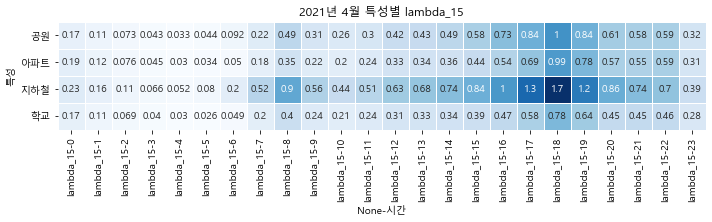

In [56]:
plt.figure(figsize = (10, 20))
sns.heatmap(data_pivot_lambda, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2021년 4월 특성별 lambda_15')
plt.tight_layout()
plt.show()

In [57]:
data_pivot_lambda_std = data.pivot_table(index = ['특성'], columns = ['시간'], values = ['lambda_15'], aggfunc = 'std')
data_pivot_lambda_std.head()

lambda_15                                                              \
시간         0         1         2         3         4         5         6    
특성                                                                          
공원   0.173897  0.114816  0.081094  0.050330  0.040063  0.093494  0.143974   
아파트  0.172984  0.108892  0.068244  0.053787  0.035272  0.049538  0.067619   
지하철  0.271946  0.189834  0.117323  0.074120  0.062975  0.107906  0.271152   
학교   0.162001  0.114958  0.086371  0.051417  0.040247  0.038790  0.070813   

                                                                           \
시간         7         8         9         10        11        12        13   
특성                                                                          
공원   0.357055  0.648551  0.396964  0.292013  0.283020  0.390018  0.419009   
아파트  0.285575  0.635938  0.250293  0.192211  0.219744  0.310209  0.324461   
지하철  0.665306  1.019798  0.556712  0.416287  0.465110  0.594514  0.674438   
학교   0.218389  0.461736  0.289357  0.212446  0.229123  0.292350  0.301037   

                                                                           \
시간         14        15        16        17        18        19        20   
특성                                                                          
공원   0.525460  0.639916  0.791175  0.826966  0.969982  0.826231  0.580165   
아파트  0.366371  0.480219  0.592686  0.681985  0.915971  0.696561  0.508378   
지하철  0.787373  1.025785  1.285546  1.618187  1.858828  1.375815  1.045390   
학교   0.337492  0.425469  0.547502  0.644302  0.787917  0.621711  0.406737   

                                   
시간         21        22        23  
특성                                 
공원   0.578825  0.592230  0.322976  
아파트  0.487835  0.496323  0.277397  
지하철  0.933617  0.865644  0.506858  
학교   0.417025  0.405463  0.272460

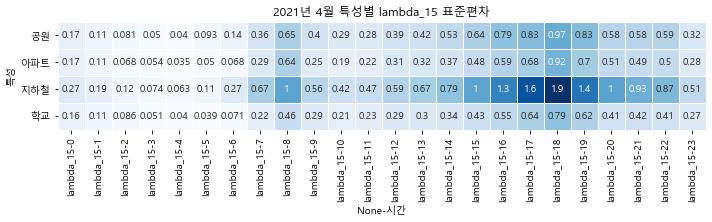

In [58]:
plt.figure(figsize = (10, 20))
sns.heatmap(data_pivot_lambda_std, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2021년 4월 특성별 lambda_15 표준편차')
plt.tight_layout()
plt.show()

In [59]:
data_pivot_mu = data.pivot_table(index = ['특성'], columns = ['시간'], values = ['mu_15'])
data_pivot_mu.head()

mu_15                                                              \
시간         0         1         2         3         4         5         6    
특성                                                                          
공원   0.129667  0.082867  0.053533  0.031067  0.025533  0.057533  0.151067   
아파트  0.131993  0.089710  0.059928  0.034819  0.033007  0.062355  0.191630   
지하철  0.221674  0.139100  0.094089  0.063576  0.046005  0.052693  0.134056   
학교   0.122392  0.083277  0.049320  0.028345  0.028231  0.053912  0.141156   

                                                                           \
시간         7         8         9         10        11        12        13   
특성                                                                          
공원   0.430733  0.586333  0.347933  0.314533  0.399400  0.446867  0.504267   
아파트  0.516196  0.634058  0.372645  0.294420  0.333514  0.383696  0.404420   
지하철  0.417534  0.880061  0.528362  0.422831  0.521855  0.634960  0.708369   
학교   0.350283  0.559921  0.324263  0.255726  0.292800  0.350397  0.380102   

                                                                           \
시간         14        15        16        17        18        19        20   
특성                                                                          
공원   0.546933  0.653133  0.756200  0.847533  0.971867  0.639467  0.535467   
아파트  0.433116  0.476920  0.556268  0.635906  0.758623  0.545435  0.448116   
지하철  0.808550  0.895535  1.028886  1.307683  1.676735  1.147686  0.893890   
학교   0.406973  0.485714  0.583957  0.617290  0.650907  0.456236  0.375907   

                                   
시간         21        22        23  
특성                                 
공원   0.462867  0.405733  0.205733  
아파트  0.416486  0.362536  0.183986  
지하철  0.821168  0.707719  0.344884  
학교   0.354082  0.322506  0.173583

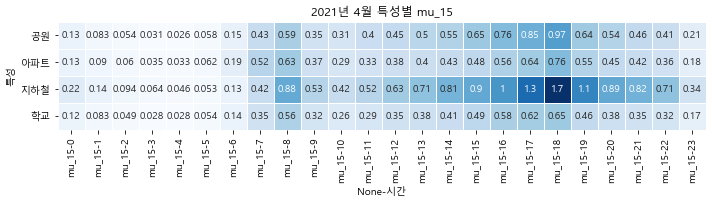

In [60]:
plt.figure(figsize = (10, 20))
sns.heatmap(data_pivot_mu, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2021년 4월 특성별 mu_15')
plt.tight_layout()
plt.show()

In [61]:
data_pivot_mu_std = data.pivot_table(index = ['특성'], columns = ['시간'], values = ['mu_15'], aggfunc = 'std')
data_pivot_mu_std.head()

mu_15                                                              \
시간         0         1         2         3         4         5         6    
특성                                                                          
공원   0.120308  0.079511  0.055623  0.040305  0.040297  0.079244  0.175671   
아파트  0.121456  0.084284  0.056309  0.035440  0.047546  0.086853  0.187912   
지하철  0.279827  0.173038  0.114382  0.078136  0.056582  0.071815  0.143926   
학교   0.126520  0.089341  0.057392  0.037493  0.042865  0.075072  0.154733   

                                                                           \
시간         7         8         9         10        11        12        13   
특성                                                                          
공원   0.433841  0.589504  0.302344  0.258199  0.338470  0.408220  0.450963   
아파트  0.457754  0.570309  0.295565  0.228056  0.296259  0.310774  0.324228   
지하철  0.448815  0.978835  0.485774  0.352466  0.438753  0.540044  0.668465   
학교   0.393754  0.519295  0.268903  0.193029  0.224224  0.277513  0.318279   

                                                                           \
시간         14        15        16        17        18        19        20   
특성                                                                          
공원   0.556301  0.660356  0.731703  0.805987  0.911462  0.579852  0.502193   
아파트  0.361397  0.462160  0.549259  0.632362  0.694060  0.482665  0.387569   
지하철  0.863514  1.058000  1.245304  1.486875  1.791383  1.251389  1.006554   
학교   0.315948  0.410601  0.507266  0.571710  0.671366  0.461911  0.358511   

                                   
시간         21        22        23  
특성                                 
공원   0.443535  0.378720  0.191866  
아파트  0.402909  0.355086  0.160350  
지하철  0.928373  0.805733  0.441417  
학교   0.359104  0.349459  0.167978

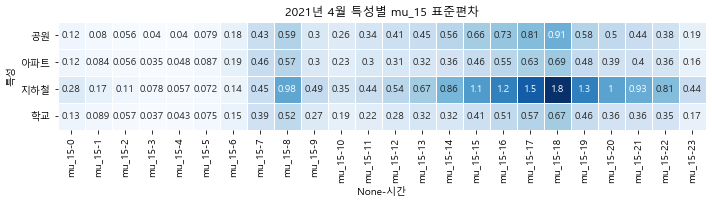

In [62]:
plt.figure(figsize = (10, 20))
sns.heatmap(data_pivot_mu_std, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2021년 4월 특성별 mu_15 표준편차')
plt.tight_layout()
plt.show()

In [63]:
data_pivot_rho = data.pivot_table(index = ['특성'], columns = ['시간'], values = ['rho'])
data_pivot_rho.head()

rho                                                              \
시간         0         1         2         3         4         5         6    
특성                                                                          
공원   1.395580  1.592185  1.651204  1.174014  1.208004  1.032575  1.293860   
아파트  1.691637  1.455249  1.461277  1.402545  0.998661  0.769666  0.447247   
지하철  1.111371  1.247738  1.315343  1.259100  1.366374  2.031427  2.401273   
학교   1.654669  1.523918  1.617256  1.483676  1.126644  0.754267  0.831099   

                                                                           \
시간         7         8         9         10        11        12        13   
특성                                                                          
공원   1.005218  1.128418  0.974631  0.886606  0.734025  0.897607  0.804224   
아파트  0.462300  0.727882  0.543587  0.636700  0.749132  0.775000  0.771313   
지하철  1.479551  1.145980  1.149860  1.024947  0.941769  0.961147  0.929364   
학교   1.963583  1.401305  1.119503  0.871355  0.798160  0.887690  0.874860   

                                                                           \
시간         14        15        16        17        18        19        20   
특성                                                                          
공원   0.867095  0.819147  0.886617  0.973618  1.158435  1.267523  1.180707   
아파트  0.728232  0.859622  0.890045  1.068257  1.316903  1.467559  1.300606   
지하철  0.868541  0.881830  0.930059  0.960187  0.982033  1.034937  0.927549   
학교   0.817851  0.756026  0.795633  0.929897  1.280215  1.454311  1.209920   

                                   
시간         21        22        23  
특성                                 
공원   1.368574  1.608036  1.854178  
아파트  1.460342  2.071321  1.871704  
지하철  0.910171  1.008178  1.131678  
학교   1.504906  1.837497  1.771896

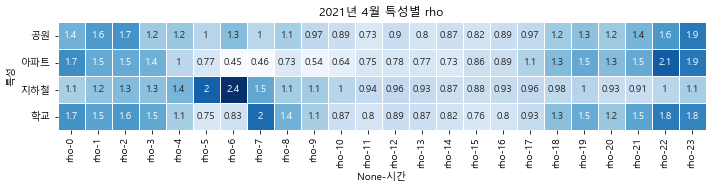

In [64]:
plt.figure(figsize = (10, 20))
sns.heatmap(data_pivot_rho, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2021년 4월 특성별 rho')
plt.tight_layout()
plt.show()

In [65]:
data_pivot_L_s = data.pivot_table(index = ['특성'], columns = ['시간'], values = ['L_s'])
data_pivot_L_s.head()

L_s                                                              \
시간         0         1         2         3         4         5         6    
특성                                                                          
공원   2.828856  3.255540  2.865262  2.568181  2.589709  1.371736  1.701050   
아파트  2.722099  2.529737  2.330228  2.301523  1.742526  1.015213  0.589701   
지하철  3.351549  4.107345  3.881872  3.314087  3.733702  4.005812  4.169652   
학교   2.048810  1.954893  1.862363  1.714073  1.322253  0.608503  0.775285   

                                                                           \
시간         7         8         9         10        11        12        13   
특성                                                                          
공원   1.475312  2.051685  1.981783  1.757029  1.550794  2.174228  1.845484   
아파트  0.744798  1.017062  1.020479  1.251777  1.280506  1.708071  1.663264   
지하철  4.039075  3.747451  3.750853  3.507798  3.452684  3.759953  3.316165   
학교   1.126204  1.300420  1.223379  1.209892  1.414155  1.486089  1.393881   

                                                                           \
시간         14        15        16        17        18        19        20   
특성                                                                          
공원   2.064353  2.103818  2.545193  2.704299  2.846875  3.265931  2.821249   
아파트  1.680518  1.826912  2.027429  2.307132  2.621583  2.794068  2.617872   
지하철  2.847796  3.229619  3.649866  3.749228  3.736258  3.853302  3.241752   
학교   1.496012  1.415089  1.478211  1.696405  1.972010  2.188447  1.953749   

                                   
시간         21        22        23  
특성                                 
공원   2.978525  3.360943  3.334221  
아파트  2.657388  2.899138  2.962849  
지하철  3.031047  3.416580  3.879584  
학교   1.988676  2.117898  2.263260

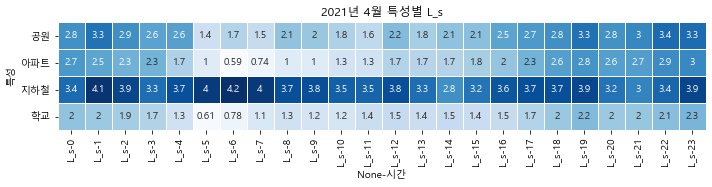

In [66]:
plt.figure(figsize = (10, 20))
sns.heatmap(data_pivot_L_s, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2021년 4월 특성별 L_s')
plt.tight_layout()
plt.show()

In [67]:
data_pivot_L_s_std = data.pivot_table(index = ['특성'], columns = ['시간'], values = ['L_s'], aggfunc = 'std')
data_pivot_L_s_std.head()

L_s                                                              \
시간         0         1         2         3         4         5         6    
특성                                                                          
공원   3.637608  4.031951  3.894616  3.878147  4.553939  2.870320  3.369600   
아파트  3.387983  3.343526  3.119934  3.326986  3.293044  1.901669  1.542089   
지하철  4.075615  6.055779  5.042604  4.891819  6.832546  6.739897  6.829084   
학교   2.530202  2.406539  2.534820  2.543842  2.380899  1.031525  1.672992   

                                                                           \
시간         7         8         9         10        11        12        13   
특성                                                                          
공원   2.865324  3.545090  3.122828  2.482863  1.881365  2.383945  1.911501   
아파트  1.771927  2.026141  1.591195  1.594482  1.391180  2.565631  2.027721   
지하철  6.913911  6.684670  6.481534  4.687917  5.080802  7.189700  5.456992   
학교   2.169668  2.367209  2.138109  1.746739  1.934302  1.925966  1.504885   

                                                                           \
시간         14        15        16        17        18        19        20   
특성                                                                          
공원   2.285691  2.306266  3.078079  3.364874  3.626309  3.921478  3.365170   
아파트  2.440380  2.324398  2.557474  2.912129  3.181223  3.345166  3.205295   
지하철  2.940865  4.984206  5.994797  6.130321  6.993408  7.102663  5.859902   
학교   2.049641  1.908532  2.146404  2.254922  2.422029  2.606162  2.169498   

                                   
시간         21        22        23  
특성                                 
공원   3.702022  4.027291  4.015420  
아파트  3.103376  3.420848  3.523202  
지하철  6.676175  6.898314  6.460654  
학교   2.238925  2.295290  2.619652

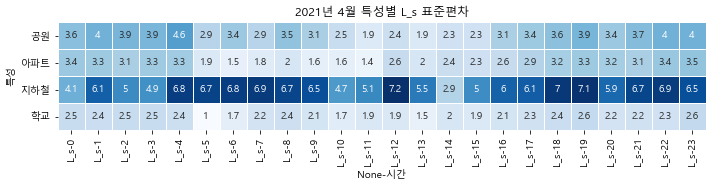

In [68]:
plt.figure(figsize = (10, 20))
sns.heatmap(data_pivot_L_s_std, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2021년 4월 특성별 L_s 표준편차')
plt.tight_layout()
plt.show()

In [69]:
data_pivot_W_s = data.pivot_table(index = ['특성'], columns = ['시간'], values = ['W_s'])
data_pivot_W_s.head()

W_s                                                            \
시간          0          1          2           3           4           5    
특성                                                                         
공원   32.725240  54.877117  85.447543  116.651843  159.866142   58.209965   
아파트  25.102622  38.545865  54.765725   93.795163   82.916319   44.400652   
지하철  26.134697  52.794349  73.837727  107.793108  128.607317  130.058047   
학교   24.370980  40.551305  57.639333   95.813795   72.257798   37.821062   

                                                                             \
시간          6          7         8         9         10        11        12   
특성                                                                            
공원   35.900075  11.581824  7.017382  9.382772  8.608835  5.951592  6.308161   
아파트  12.898928   4.280754  3.656380  4.709603  6.019927  5.616199  5.340133   
지하철  66.574294  15.861405  6.804275  9.121216  9.605068  7.316109  6.032766   
학교   26.495838  14.989948  7.562361  7.817461  7.185062  6.557847  5.536298   

                                                                           \
시간         13        14        15        16        17        18        19   
특성                                                                          
공원   4.827806  4.909731  4.239165  3.935391  3.610029  3.416492  5.443237   
아파트  5.132096  4.631861  4.479787  4.094050  3.901925  3.578000  4.783521   
지하철  5.256178  4.477804  4.332813  3.982209  3.172903  2.534935  3.743405   
학교   5.067204  4.730705  3.873525  3.382981  3.454411  3.735014  5.270385   

                                               
시간         20        21         22         23  
특성                                             
공원   6.206465  8.473109   9.784730  20.765695  
아파트  5.706009  6.849234   8.687847  17.214948  
지하철  4.497192  4.880283   6.315630  14.499618  
학교   6.034704  7.449770  10.760753  18.669697

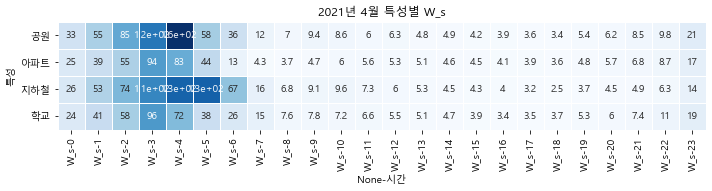

In [70]:
plt.figure(figsize = (10, 20))
sns.heatmap(data_pivot_W_s, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2021년 4월 특성별 W_s')
plt.tight_layout()
plt.show()

In [71]:
data_pivot_W_s_std = data.pivot_table(index = ['특성'], columns = ['시간'], values = ['W_s'], aggfunc = 'std')
data_pivot_W_s_std.head()

W_s                                                              \
시간          0           1           2           3           4           5    
특성                                                                           
공원   56.190200   64.181263  192.143949  219.101810  328.250521  111.789014   
아파트  29.286678   49.886537   79.439818  131.614089  145.949455  104.206548   
지하철  39.857532  112.193764  120.731602  208.806814  241.184810  213.100916   
학교   27.987429   55.603068   80.111522  151.198368  121.432797   71.401822   

                                                                      \
시간           6          7          8          9         10        11   
특성                                                                     
공원    85.464893  20.323678  10.066663  10.393390  8.467984  4.039706   
아파트   31.603129   7.337282   5.840636   4.343643  4.823127  4.401184   
지하철  116.010011  21.218302   8.728210   9.629522  7.042328  4.648904   
학교    66.202335  38.373833  18.593743  10.600545  5.490312  5.465093   

                                                                           \
시간         12        13        14        15        16        17        18   
특성                                                                          
공원   4.225528  2.820598  3.153087  2.793667  2.633123  2.337926  2.368604   
아파트  4.198632  4.995498  3.553875  3.159391  2.901725  2.737522  2.705089   
지하철  3.499670  2.879091  2.316481  2.241805  2.198232  1.817171  1.549867   
학교   3.789668  3.277372  3.457388  2.465578  2.219174  2.214662  2.486831   

                                                          
시간         19        20         21         22         23  
특성                                                        
공원   4.017969  4.408769  11.590139   9.223453  27.926585  
아파트  3.366819  4.253845   5.938141   7.562371  17.120185  
지하철  2.114203  2.715206   3.464963   5.398067  13.609363  
학교   3.251925  3.899968   6.170683  20.048812  20.711919

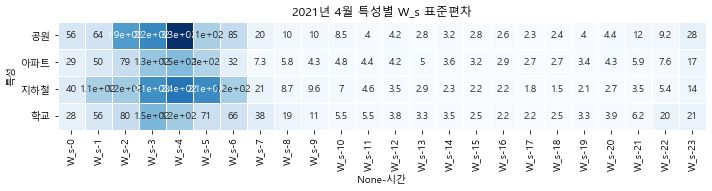

In [72]:
plt.figure(figsize = (10, 20))
sns.heatmap(data_pivot_W_s_std, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2021년 4월 특성별 W_s 표준편차')
plt.tight_layout()
plt.show()